## Task 4.4 Supervised Learning - Classification and hyperparameter tuning

In [24]:
import pandas as pd

# Datensatz laden
file_path = '../../data/raw/cox2.csv'
df = pd.read_csv(file_path)

# Load prüfen
print(f"Dataset loaded with shape: {df.shape}")


Dataset loaded with shape: (462, 257)


## Split the Dataset

In [25]:
from sklearn.model_selection import train_test_split

# Features und Zielvariable definieren
X = df.drop(columns=['IC50', 'cox2Class'])
y = df['cox2Class']

# Aufteilen in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# Ausgabe der Form zur Bestätigung
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")


Train shape: (346, 255), Test shape: (116, 255)


## Select a Learning Method

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Pipeline mit optionaler Skalierung und RandomForest-Klassifikator
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Skalierung der Merkmale
    ('clf', RandomForestClassifier(random_state=42))  # Klassifikator
])

# Modelltraining mit Trainingsdaten
pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', RandomForestClassifier(random_state=42))])

## Perform 10-Fold Cross-Validation

In [27]:
from sklearn.model_selection import cross_val_score

# 10-fache Kreuzvalidierung mit RandomForest-Pipeline
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=10)

# Ausgabe der mittleren Genauigkeit und Streuung
print(f"Mean CV Accuracy: {cv_scores.mean():.3f}")
print(f"Standard Deviation: {cv_scores.std():.3f}")


Mean CV Accuracy: 0.821
Standard Deviation: 0.030


## Analyze Performance

In [28]:
from sklearn.metrics import accuracy_score

# Vorhersagen auf dem Testset
y_pred = pipeline.predict(X_test)

# Genauigkeit berechnen
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.3f}")


Test Accuracy: 0.845


## Apply the Final Model

Accuracy: 0.845
Cohen's Kappa: 0.416
ROC AUC Score: 0.823

Classification Report:
              precision    recall  f1-score   support

      Active       0.69      0.39      0.50        23
    Inactive       0.86      0.96      0.91        93

    accuracy                           0.84       116
   macro avg       0.78      0.67      0.70       116
weighted avg       0.83      0.84      0.83       116



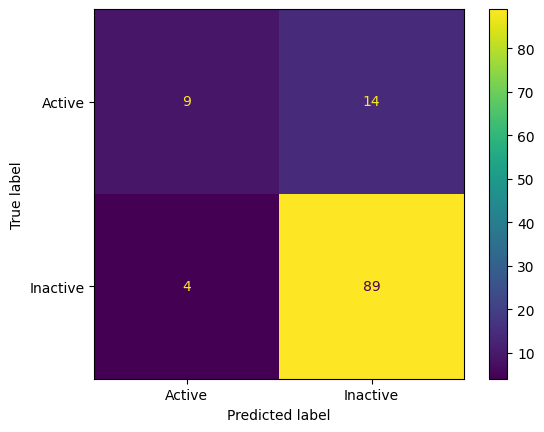

In [29]:
from sklearn.metrics import accuracy_score, cohen_kappa_score, roc_auc_score, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelBinarizer

# Vorhersagen auf dem Testset (Pipeline enthält Skalierung und Modell)
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]  # Für ROC AUC

# Zielvariable binär codieren für ROC AUC
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)

# Metriken berechnen
accuracy = accuracy_score(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test_bin, y_proba)

# Ergebnisse ausgeben
print(f"Accuracy: {accuracy:.3f}")
print(f"Cohen's Kappa: {kappa:.3f}")
print(f"ROC AUC Score: {roc_auc:.3f}")

# Optional: detaillierter Bericht
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Konfusionsmatrix anzeigen
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
